In [9]:
!pip install xlrd

     |████████████████████████████████| 103 kB 4.9 MB/s eta 0:00:01


In [5]:
!pip install geopandas

     |████████████████████████████████| 962 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 14.7 MB 11.1 MB/s eta 0:00:01


In [26]:
!pip install geoplot

     |████████████████████████████████| 283 kB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 7.2 MB/s eta 0:00:01     |███████████▍                    | 2.4 MB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 41.9 MB/s eta 0:00:01
     |████████████████████████████████| 18.2 MB 12.6 MB/s eta 0:00:01     |███████████████████████████▍    | 15.6 MB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 49.8 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 44.4 MB/s eta 0:00:01
  Using cached affine-2.3.0-py2.py3-none-any.whl (15 kB)


In [22]:
!pip install descartes

In [11]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy.ma as ma
import csv
import pandas as pd
import geopandas as gpd

In [10]:
data = pd.read_excel('longitude.xlsx')


In [12]:

latDD=[] # create an empty list for the Decimal Latitude
for item in data['Latitude']:
    deg = item.split('°')[0] # extract the degree value from latitude string
    rest1 = item.split('°')[1] # the rest of the string with minutes,seconds & pol
    minut = rest1.split('\'')[0] #extract the minute value from string with minutes,seconds & pol
    rest2 = rest1.split('\'')[1] #the rest of the string with seconds & pol
    sec = rest2.split('"')[0] #extract the seconds value from string with seconds & pol
    pol = rest2.split('"')[1] #extract the pol
    
    # Calculate the decimal value of the coordinate
    if pol == 'S':
        DD = -1*float(deg)-float(minut)/60-float(sec)/3600
    else:
        DD = float(deg)+float(minut)/60+float(sec)/3600
        
    latDD.append(DD)
    

In [13]:
longDD=[] # create an empty list for the Decimal Longitude
for item in data['Longitude']:
    deg = item.split('°')[0] # extract the degree value from Longitude string
    rest1 = item.split('°')[1] # the rest of the string with minutes,seconds & pol
    minut = rest1.split('\'')[0] #extract the minute value from string with minutes,seconds & pol
    rest2 = rest1.split('\'')[1] #the rest of the string with seconds & pol
    sec = rest2.split('"')[0] #extract the seconds value from string with seconds & pol
    pol = rest2.split('"')[1] #extract the pol
    
    # Calculate the decimal value of the coordinate
    
    DD = -1*float(deg)-float(minut)/60-float(sec)/3600
        
    longDD.append(DD)
 

In [14]:
Lapan= pd.read_excel('LAPANdata.xlsx')
Lapan

,Site,Latitude,Longitude,Date of deployment,Date of removal,Deployment length (days),Measured Conc (ng/m3)
0,"Iguaçu National Park, PR",25°37’36.25”S,54°28’43.15”W,2017-10-20,2018-11-09 00:00:00,385,0.63
1,"São José dos Ausentes, RS",28°35.799'S,49°48.786'W,2017-11-16,2018-11-20 00:00:00,369,0.63
2,"Rocas Atoll, RN","3°51'23.08""S","33°49'2.74""W",2017-11-20,2019-02-24 00:00:00,461,0.33
3,"Cristalino State Park, MT","9°35'52.126""S",55°55'56.194''W,2017-12-05,2019-03-27 00:00:00,477,0.57
4,"Abrolhos (Redonda Island), BA",17°58’594’’S,38°41’412’’W,2018-01-16,2019-01-13 00:00:00,362,0.96
5,"Rio Grande, RS","32° 4'8.06""S","52° 9'41.31""W",2018-02-01,2019-01-31 00:00:00,364,1
6,"Puruzinho, AM","7°22'14.00""S","63° 3'34.00""W",2018-03-24,2019-04-06 00:00:00,378,0.79
7,"Itatiaia National Park, RJ","22°23'9.00""S","44°40'44.00""W",2018-03-27,2019-07-02 00:00:00,462,0.8
8,"São Luis do maranhão, MA","2°35'37.80""S","44°12'40.30""W",2018-04-06,2019-04-01 00:00:00,360,1.04
9,"Nova Nazaré, MT","13°57'31.02""S","51°46'36.96""W",2018-04-13,2019-04-18 00:00:00,370,0.76


In [15]:
Lapan['Latitude']= latDD
Lapan['Longitude']= longDD

Lapan

,Site,Latitude,Longitude,Date of deployment,Date of removal,Deployment length (days),Measured Conc (ng/m3)
0,"Iguaçu National Park, PR",-25.626736,-54.478653,2017-10-20,2018-11-09 00:00:00,385,0.63
1,"São José dos Ausentes, RS",-28.596650,-49.813100,2017-11-16,2018-11-20 00:00:00,369,0.63
2,"Rocas Atoll, RN",-3.856411,-33.817428,2017-11-20,2019-02-24 00:00:00,461,0.33
3,"Cristalino State Park, MT",-9.597813,-55.932276,2017-12-05,2019-03-27 00:00:00,477,0.57
4,"Abrolhos (Redonda Island), BA",-18.131667,-38.797778,2018-01-16,2019-01-13 00:00:00,362,0.96
5,"Rio Grande, RS",-32.068906,-52.161475,2018-02-01,2019-01-31 00:00:00,364,1
6,"Puruzinho, AM",-7.370556,-63.059444,2018-03-24,2019-04-06 00:00:00,378,0.79
7,"Itatiaia National Park, RJ",-22.385833,-44.678889,2018-03-27,2019-07-02 00:00:00,462,0.8
8,"São Luis do maranhão, MA",-2.593833,-44.211194,2018-04-06,2019-04-01 00:00:00,360,1.04
9,"Nova Nazaré, MT",-13.958617,-51.776933,2018-04-13,2019-04-18 00:00:00,370,0.76


In [16]:
Lapan.describe()

,Latitude,Longitude,Deployment length (days)
count,28.000000,28.000000,28.000000
mean,-13.580320,-60.177442,391.214286
std,17.645570,15.863408,58.689615
min,-54.414400,-87.202778,301.000000
25%,-24.947690,-70.787381,361.000000
50%,-15.154486,-60.722389,369.500000
75%,-0.365243,-49.051354,415.250000
max,14.097500,-29.312139,578.000000


,Site,Latitude,Longitude,Date of deployment,Date of removal,Deployment length (days),Measured Conc (ng/m3),geometry
0,"Iguaçu National Park, PR",-25.626736,-54.478653,2017-10-20,2018-11-09 00:00:00,385,0.63,POINT (-54.47865 -25.62674)
1,"São José dos Ausentes, RS",-28.596650,-49.813100,2017-11-16,2018-11-20 00:00:00,369,0.63,POINT (-49.81310 -28.59665)
2,"Rocas Atoll, RN",-3.856411,-33.817428,2017-11-20,2019-02-24 00:00:00,461,0.33,POINT (-33.81743 -3.85641)
3,"Cristalino State Park, MT",-9.597813,-55.932276,2017-12-05,2019-03-27 00:00:00,477,0.57,POINT (-55.93228 -9.59781)
4,"Abrolhos (Redonda Island), BA",-18.131667,-38.797778,2018-01-16,2019-01-13 00:00:00,362,0.96,POINT (-38.79778 -18.13167)
5,"Rio Grande, RS",-32.068906,-52.161475,2018-02-01,2019-01-31 00:00:00,364,1,POINT (-52.16147 -32.06891)
6,"Puruzinho, AM",-7.370556,-63.059444,2018-03-24,2019-04-06 00:00:00,378,0.79,POINT (-63.05944 -7.37056)
7,"Itatiaia National Park, RJ",-22.385833,-44.678889,2018-03-27,2019-07-02 00:00:00,462,0.8,POINT (-44.67889 -22.38583)
8,"São Luis do maranhão, MA",-2.593833,-44.211194,2018-04-06,2019-04-01 00:00:00,360,1.04,POINT (-44.21119 -2.59383)
9,"Nova Nazaré, MT",-13.958617,-51.776933,2018-04-13,2019-04-18 00:00:00,370,0.76,POINT (-51.77693 -13.95862)


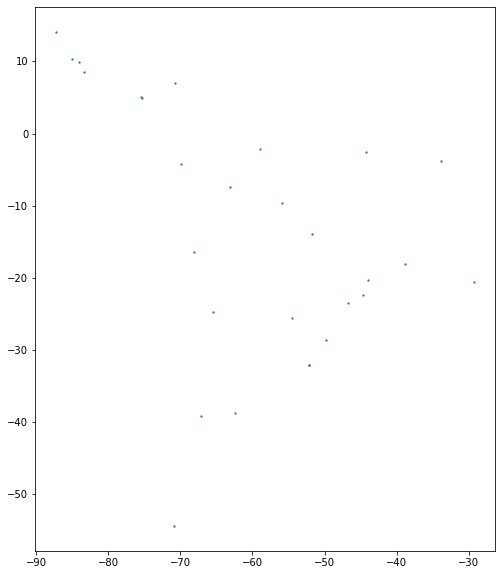

In [59]:
# Creating GeoPandas GeoDataFrame using the Pandas Dataframe 
Lapan_gdf = gpd.GeoDataFrame(Lapan, geometry = gpd.points_from_xy(Lapan['Longitude'],Lapan['Latitude'] ))
Lapan_gdf.plot(markersize = 1.5, figsize = (10,10))
Lapan_gdf

<AxesSubplot:>

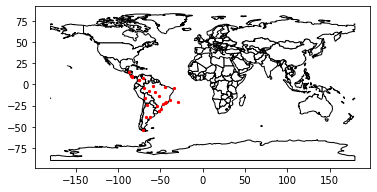

In [23]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')
Lapan_gdf.plot(ax=ax,marker='o', color='red', markersize=5)


<AxesSubplot:>

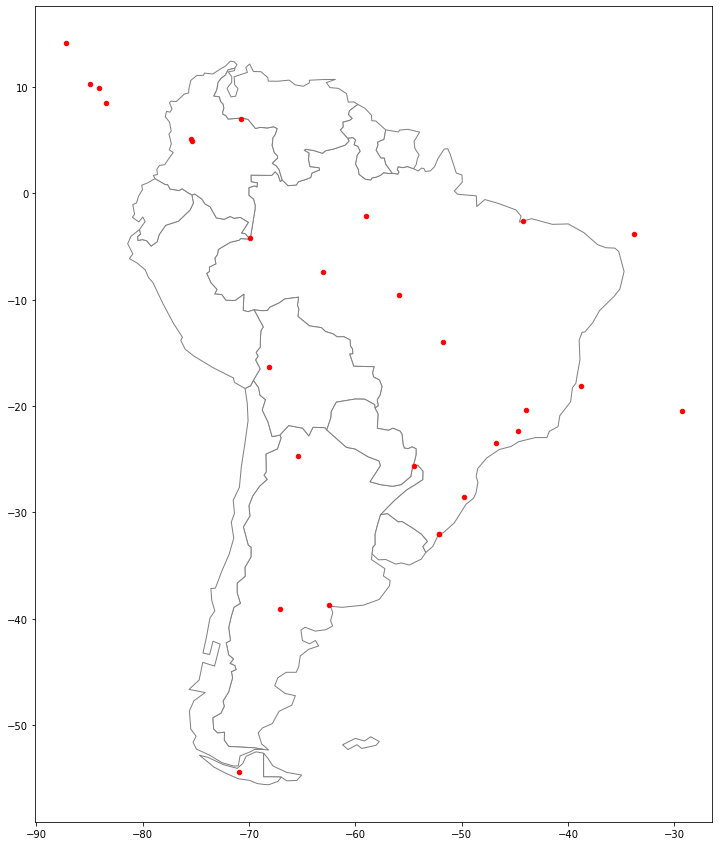

In [58]:
import geoplot
SAmerica = world.query('continent == "South America"')
#NAmerica =world.query('continent == "North America"')
fig, ax = plt.subplots(figsize = (15,15))

'''ax = geoplot.cartogram(
    SAmerica, scale='pop_est', limits=(0.2, 1),
    edgecolor='None', figsize=(7, 8)
)'''
#NAmerica.plot(ax=ax,color='white', edgecolor='gray' )
SAmerica.plot(ax=ax,color='white', edgecolor='gray' )
Lapan_gdf.plot(ax=ax,marker='o', color='red', markersize=20)

Text(0.5, 1.0, 'Cities in the contiguous United States, 2010')

/home/tzd/anaconda3/envs/UniToro/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


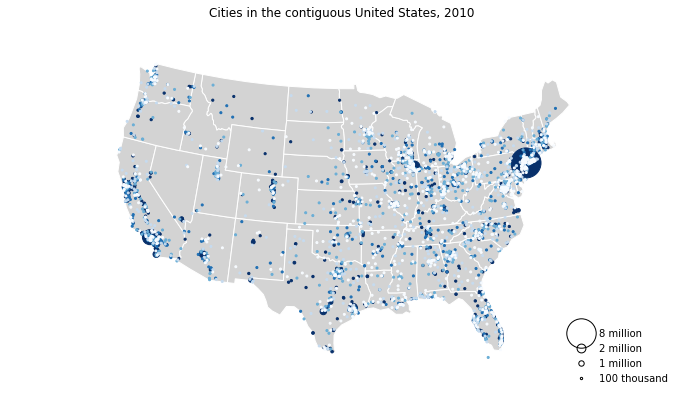

In [45]:
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc
continental_usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
continental_usa_cities = continental_usa_cities.query('STATE not in ["AK", "HI", "PR"]')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

scheme = mc.Quantiles(continental_usa_cities['POP_2010'], k=5)
proj = gcrs.AlbersEqualArea()

ax = gplt.polyplot(
    contiguous_usa,
    zorder=-1,
    linewidth=1,
    projection=proj,
    edgecolor='white',
    facecolor='lightgray',
    figsize=(12, 12)
)

gplt.pointplot(
    continental_usa_cities,
    scale='POP_2010',
    limits=(2, 30),
    hue='POP_2010',
    cmap='Blues',
    scheme=scheme,
    legend=True,
    legend_var='scale',
    legend_values=[8000000, 2000000, 1000000, 100000],
    legend_labels=['8 million', '2 million', '1 million', '100 thousand'],
    legend_kwargs={'frameon': False, 'loc': 'lower right'},
    ax=ax
)

plt.title("Cities in the contiguous United States, 2010")

In [48]:
gplt.datasets

AttributeError: module 'geoplot.datasets' has no attribute 'describe'

In [50]:
gpd.read_file(gplt.datasets.get_path('south_america'))

ValueError: The dataset_name value 'south_america' is not in the list of valid names.

In [62]:
Lapan.to_csv('Lapan.csv', index=False)

In [61]:
! ls

AMNet-AL19.csv
AMNet-FL96.csv
AMNet-GA40.csv
AtmosphericGases-TGM-ECCC_AQRD-YT_LittleFoxLake-2009.csv
AtmosphericGases-TGM-ECCC_AQRD-YT_LittleFoxLake-2010.csv
AtmosphericGases-TGM-ECCC_AQRD-YT_LittleFoxLake-2011.csv
AtmosphericGases-TGM-ECCC_AQRD-YT_LittleFoxLake-2012.csv
AtmosphericGases-TGM-ECCC_AQRD-YT_LittleFoxLake-2013.csv
AtmosphericGases-TGM-ECCC_AQRD-YT_LittleFoxLake-2014.csv
AtmosphericGases-TGM-ECCC_AQRD-YT_LittleFoxLake-2015.csv
AtmosphericGases-TGM-ECCC_AQRD-YT_LittleFoxLake-2016.csv
Base_vs_ASGM-Copy1.ipynb
Base_vs_ASGM.ipynb
ComparingMonthlyAverages.ipynb
Coordinates.ipynb
'Coordinates.ipynb 2'
'CPT_GEM_2007_2016 copy.csv'
FL_data.ipynb
'GC_tutorial_regionmask (1).ipynb'
HelenesGCrunHg.ipynb
Helene_vs_Benchmark.ipynb
LapanData.csv
LAPANdata.xlsx
LAPAN_Modification.ipynb
longitude.xlsx
Untitled1.ipynb
Untitled.ipynb
